In [10]:
import pandas as pd
import numpy as np

# Load the dataset from the two worksheets
data_2009_2010 = pd.read_excel("online_retail_II.xlsx",sheet_name='Year 2009-2010')
data_2010_2011 = pd.read_excel("online_retail_II.xlsx",sheet_name='Year 2010-2011')

In [11]:
# Examine the datasets in two different work sheets
print(data_2009_2010.iloc[0])
print(data_2010_2011.iloc[0])

Invoice                                     489434
StockCode                                    85048
Description    15CM CHRISTMAS GLASS BALL 20 LIGHTS
Quantity                                        12
InvoiceDate                    2009-12-01 07:45:00
Price                                         6.95
Customer ID                                  13085
Country                             United Kingdom
Name: 0, dtype: object
Invoice                                    536365
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        6
InvoiceDate                   2010-12-01 08:26:00
Price                                        2.55
Customer ID                                 17850
Country                            United Kingdom
Name: 0, dtype: object


In [13]:
# Concat the two data frames into single dataset for analysis
dataset = pd.concat([data_2009_2010,data_2010_2011])

In [14]:
# Verifying the total records in the final dataset for analysis
print(len(dataset))

1067371


In [15]:
# Checking for missing values
dataset.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Nearly 243007 records dont have the customer ID field populated and description shows 4382 records are having missing values. These 243k customers could be guest users which we need to account for during data loading

In [18]:
dataset["StockCode"].nunique()

5305

In [22]:
dataset["StockCode"].unique()

array([85048, '79323P', '79323W', ..., 23609, 23617, 23843], dtype=object)

The total unqiue stock ID/products is 5305

In [26]:
# Splitting the Invoice date to Year,Month and Day for data analysis
dataset['InvoiceYear'] = pd.DatetimeIndex(dataset['InvoiceDate']).year
dataset['InvoiceMonth'] = pd.DatetimeIndex(dataset['InvoiceDate']).month
dataset['InvoiceDay'] = pd.DatetimeIndex(dataset['InvoiceDate']).day

In [27]:
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,InvoiceDay
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1


In [42]:
dataset["Country"].nunique()

43

In [59]:
df_year_txn = dataset.groupby(['InvoiceYear','InvoiceMonth']).size().reset_index(name='counts')
df_year_txn

,InvoiceYear,InvoiceMonth,counts
0,2009,12,45228
1,2010,1,31555
2,2010,2,29388
3,2010,3,41511
4,2010,4,34057
5,2010,5,35323
6,2010,6,39983
7,2010,7,33383
8,2010,8,33306
9,2010,9,42091


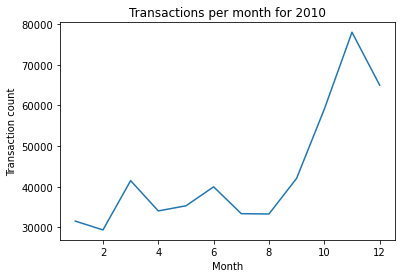

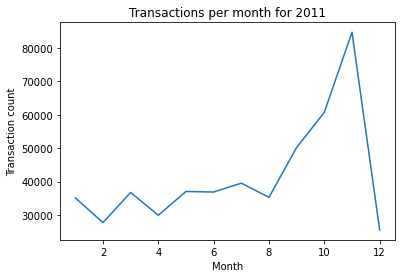

In [61]:
import matplotlib.pyplot as plt

x1 = df_year_txn[df_year_txn["InvoiceYear"] == 2010]["InvoiceMonth"]
y1 = df_year_txn[df_year_txn["InvoiceYear"] == 2010]["counts"]

plt.plot(x1,y1)
plt.title('Transactions per month for 2010')
plt.xlabel('Month')
plt.ylabel('Transaction count')
plt.show()

x2 = df_year_txn[df_year_txn["InvoiceYear"] == 2011]["InvoiceMonth"]
y2 = df_year_txn[df_year_txn["InvoiceYear"] == 2011]["counts"]

plt.plot(x2,y2)
plt.title('Transactions per month for 2011')
plt.xlabel('Month')
plt.ylabel('Transaction count')
plt.show()

The above analysis shows that the dataset contains data for all 12 months for 2011 and 2010 and only for december in 2009. Also interestingly the last quarter has too many transactions when compared to the remaining quarters. It's better to partition the data in quarter for easy access. Also for 2011 the december is missing lot of transactions. Probably the dataset has only partial data for the 2011 december month.

In [43]:
dataset.groupby(['Country']).size().reset_index(name='counts')

,Country,counts
0,Australia,1913
1,Austria,938
2,Bahrain,126
3,Belgium,3123
4,Bermuda,34
5,Brazil,94
6,Canada,228
7,Channel Islands,1664
8,Cyprus,1176
9,Czech Republic,30


The above analysis shows that more than 90% of the data is related to United Kingdom. 
Probably its better to partition UK data seperately from other countries

In [52]:
custid_df = dataset[dataset["Customer ID"].notnull()].groupby(['Customer ID']).size().reset_index(name='counts')

print(custid_df["counts"].min())
print(custid_df["counts"].max())

1
13097


A single customer can have from min 1 to max 15k transactions for two year